In [98]:
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt
import random


# Erstellen der Bernoulli-verteilten Zufallsvariablen X für Aufgabe 3
def ber(n, p):
    results = []
    for i in range(n):
        currentNumber = random.random()
        results.append(int(currentNumber < p))
    return results

# Erzeugt den Mittelwert über die Summe der X_i für Aufgabe 3.1
def mean(liste):
    return sum(liste) / len(liste)

# Erstellen der X_ik für Aufgabe 3
def ber2d(n1, n2, p):
    results = []
    for k in range(n2):
        results.append(ber(n1, p))
    return results

def yk(liste, p):
    y = 0
    n1 = len(liste)
    faktor = 1 / sqrt(p * (1-p) * n1)
    summe = 0
    for xi in liste:
        summe += xi - p
    return faktor * summe
    

def aufgabe2(ns=[10, 100, 1_000, 10_000], ps=[0.2, 0.35, 0.5, 0.65, 0.8]):
    plotNumber = 1
    fig, axs = plt.subplots(len(ns), len(ps))
    fig.tight_layout()
    fig.set_figheight(9)
    fig.set_figwidth(16)
    for n in ns:
        for p in ps:
            results = ber(n, p)
            plt.subplot(len(ns), len(ps), plotNumber, title=f"n={n}, p={p}")
            plt.xticks([0, 1], ["Misserfolg", "Erfolg"])
            plt.hist(results, 3)
            plotNumber += 1
    plt.show()

def aufgabe3_1(n=1000, p=0.5):
    results = []
    for i in range(n):
        results.append(mean(ber(i+1, p)))
    plt.plot(results)
    plt.axhline(y=p, color='r')
    plt.show()
    
def aufgabe3_2(n1=500, n2=10000, p=0.5): 
    #Teil 2 mit Y_k
    results = ber2d(n1, n2, p)
    ys = []
    for k in range(n2):
        y = yk(results[k], p)
        ys.append(y)
    plt.hist(ys, 100)
    plt.show()

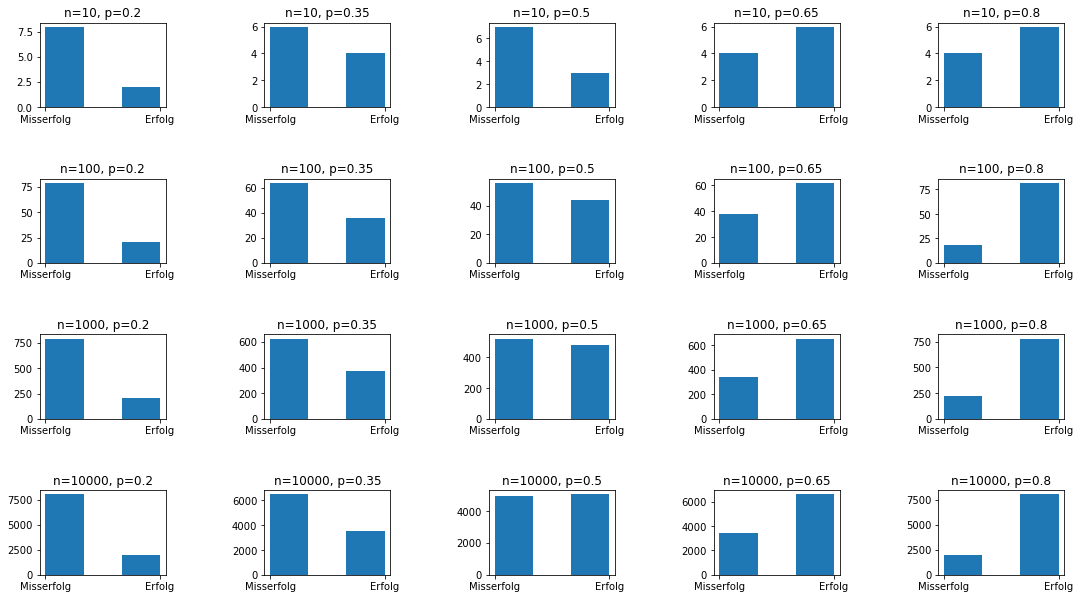

In [100]:
# Man kann die ns und ps als Liste übergeben:
# aufgabe2(ns=[10, 100], ps=[0.2, 0.7])
aufgabe2()

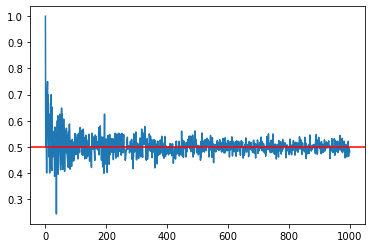

In [101]:
# Hier ebenso:
# aufgabe3_1(n=1000, p=0.5)
aufgabe3_1()

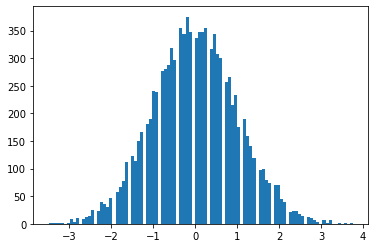

In [102]:
# Auch hier:
# aufgabe3_2(n1=1000, n2=10000, p=0.5)
aufgabe3_2()

Die Parameter `n1`, `n2` und `p` haben unterschiedliche Auswirkungen auf das erzeugte Histogramm bzw. `Y_k`.
Bei gut gewählten Parametern nähert sich das Histogramm einer Normalverteilung um den Wert 0 an.
- `n1` hat Einfluss auf die Differenzen zwischen den Bins des Histogramms. Bei kleinen Werten für `n1` wirken sich bereits wenige Abweichungen für X_{i,k} in der Summe sehr stark auf die Werte von Y_k aus. Deswegen sind auch die Sprünge zwischen den einzelnen Werten der `Y_k` größer. Bei großen `n1` wirken sich Abweichungen der X_{i,k} nicht mehr so stark aus, da wir über sehr viele Werte summieren. Weiterhin werden mögliche Ausreißer durch den Vorfaktor `1/sqrt(var(x)*n1)` stärker herunterskaliert. Wählt man `n1` zu groß, werden die Abstände zwischen den Bins so klein, dass im Histogramm mehrere Bins als einer dargestellt werden. Das Ergebnis sind stark herausragende Balken.
- `n2` ist die Anzahl der berechneten Werte `Y_k`. Je größer das `n2` gewählt wird, desto mehr nähert sich das Histogramm einer Normalverteilung an.
- `p` hat bei gut gewählten Werten für `n1` und `n2` so gut wie keinen Einfluss auf die Annäherung des Histogramms an die Normalverteilung. Wählt man `n1` jedoch zu gering, sind bei `p << 0.5` deutlich mehr Ausreißer der `Y_k` in positive Richtung und bei `p >> 0.5` deutlich mehr Ausreißer in negative Richtung zu erwarten. Der Grund dafür ist, dass sich geringe Abweichungen der erwarteten Trefferanzahl schon deutlich auf die Summe auswirken.